### Loading Packages

In [2]:
import pandas as pd 
import numpy as np                     
import seaborn as sns                  
import matplotlib.pyplot as plt        
%matplotlib inline 
import warnings   
warnings.filterwarnings("ignore")

### Reading Data

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Initially we should understand our raw data thoroughly, i.e., we should explore the no. of features/columns and rows, datatype of the features, feature names and so on. It helps in working with the data in the next stages.

### Dimensions of Data
Let’s quicky check the dimensions of our data, i.e., columns and rows.

In [4]:
train.shape,test.shape

((8523, 12), (5681, 11))

Let’s make a copy of train and test data so that even if we have to make any changes in these datasets we would not lose the original datasets.

In [5]:
train_original=train.copy() 
test_original=test.copy()

### Features of Data
We will take a quick glance over the feature names of train and test datasets.

In [6]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content  

As we can see, there are 4 numeric and 7 categorical variables.

In [7]:
train['source'] = 'train'
# test['source'] = 'test'
test['Item_Outlet_Sales'] = 0
data = pd.concat([train, test], sort = False)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [8]:
data['Item_Outlet_Sales'].describe()

count    14204.000000
mean      1308.865489
std       1699.791423
min          0.000000
25%          0.000000
50%        559.272000
75%       2163.184200
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

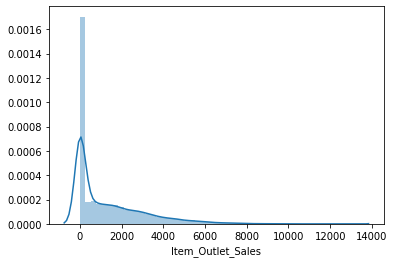

In [9]:
sns.distplot(data['Item_Outlet_Sales'])

In [10]:
print('Skewness: %f' % data['Item_Outlet_Sales'].skew())
print('Kurtsis: %f' %data['Item_Outlet_Sales'].kurt())

Skewness: 1.544684
Kurtsis: 2.419439


<ul>Deviate from the normal distribution.</ul>
<ul>Have appreciable positive skewness.</ul>
<ul>Show peakedness.</ul>

In [11]:
categorial_features = data.select_dtypes(include=[np.object])
categorial_features.head(2)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train


In [12]:
numerical_features = data.select_dtypes(include=[np.number])
numerical_features.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228


In [13]:
data['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

Let’s start with univariate EDA. It involves exploring variables individually. We will try to visualize the continuous variables using histograms and categorical variables using bar plots.

### Target Variable
Since our target variable is continuous, we can visualise it by plotting its histogram.

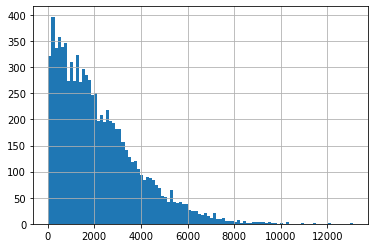

In [14]:
train['Item_Outlet_Sales'].hist(bins = 100);

As you can see, it is a right skewd variable and would need some data transformation to treat its skewness.

### Independent Variables (numeric variables)
Now let’s check the numeric independent variables. We’ll again use the histograms for visualizations because that will help us in visualizing the distribution of the variables.

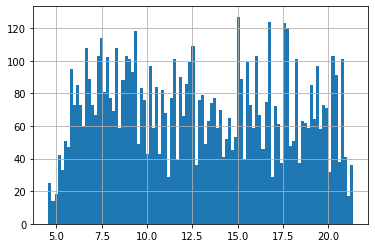

In [15]:
train['Item_Weight'].hist(bins = 100);

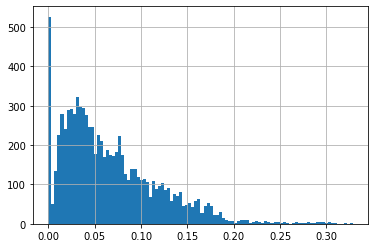

In [16]:
train['Item_Visibility'].hist(bins = 100)

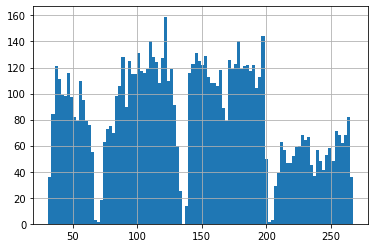

In [17]:
train['Item_MRP'].hist(bins = 100)

#### Observations

There seems to be no clear-cut pattern in Item_Weight.
Item_Visibility is right-skewed and should be transformed to curb its skewness.
We can clearly see 4 different distributions for Item_MRP. It is an interesting insight.

### Independent Variables (categorical variables)

Now we’ll try to explore and gain some insights from the categorical variables. A categorical variable or feature can have only a finite set of values. Let’s first plot Item_Fat_Content.

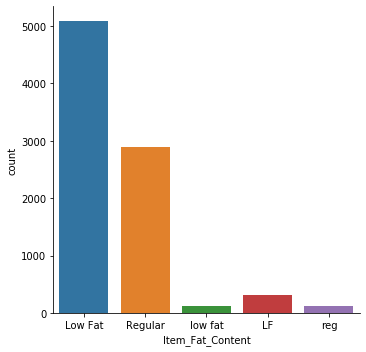

In [18]:
import seaborn as sns
sns.catplot(x="Item_Fat_Content", kind="count", data=train);

In the figure above, ‘LF’, ‘low fat’, and ‘Low Fat’ are the same category and can be combined into one. Similarly we can be done for ‘reg’ and ‘Regular’ into one. After making these corrections we’ll plot the same figure again.

In [19]:
train['Item_Fat_Content'].replace({'reg':'Regular','low fat':'Low Fat','LF':'Low Fat'},inplace = True)

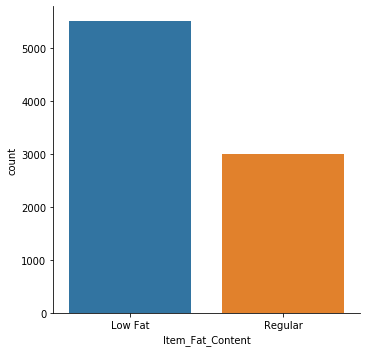

In [20]:
sns.catplot('Item_Fat_Content',kind = 'count',data = train)

### Now lets check other categorical variables

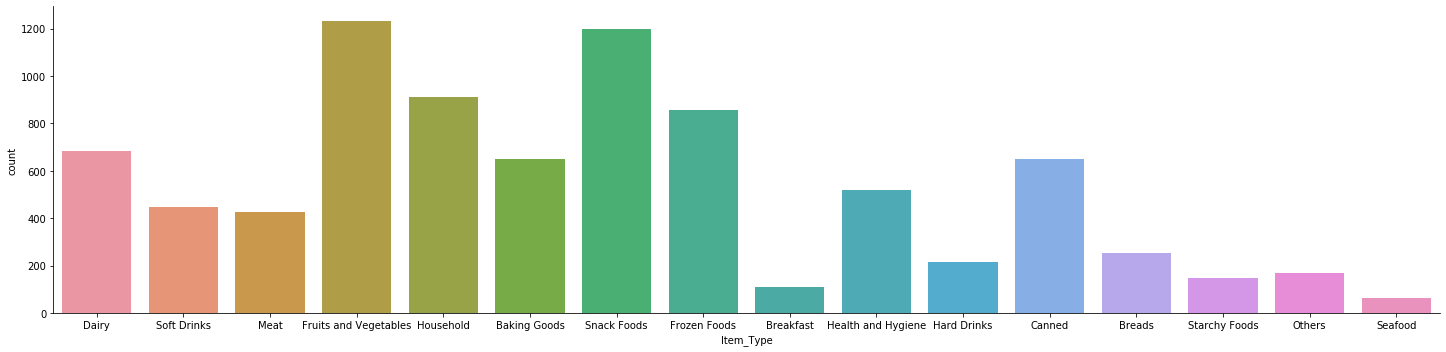

In [21]:
sns.catplot('Item_Type',kind = 'count',data = train,aspect =4)

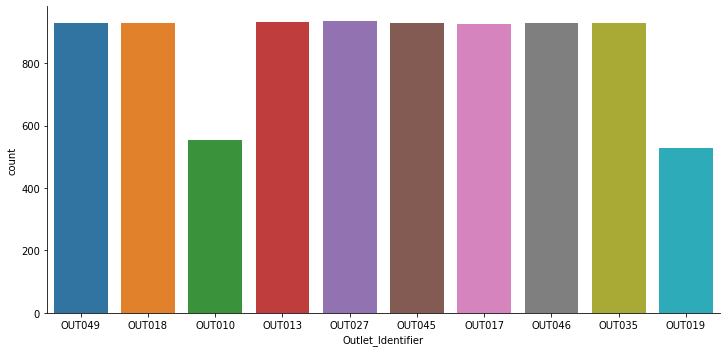

In [22]:
sns.catplot('Outlet_Identifier',kind = 'count',data = train,aspect = 2)

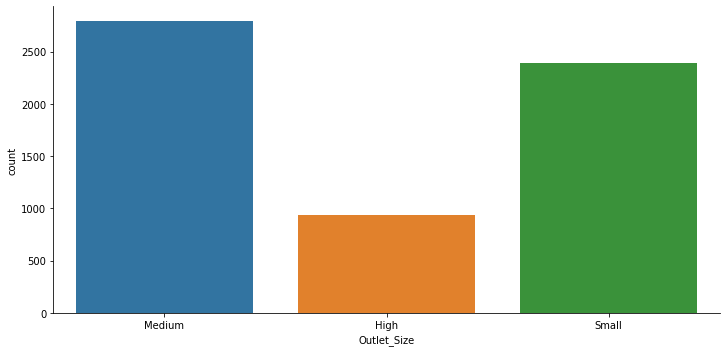

In [23]:
sns.catplot('Outlet_Size',kind = 'count',data = train,aspect = 2)

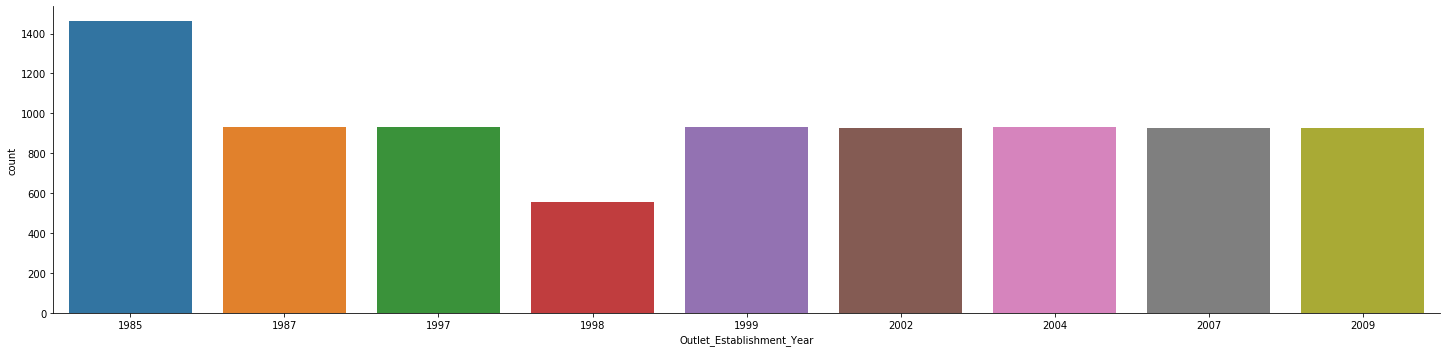

In [24]:
sns.catplot('Outlet_Establishment_Year',kind = 'count',data = train,aspect =4)

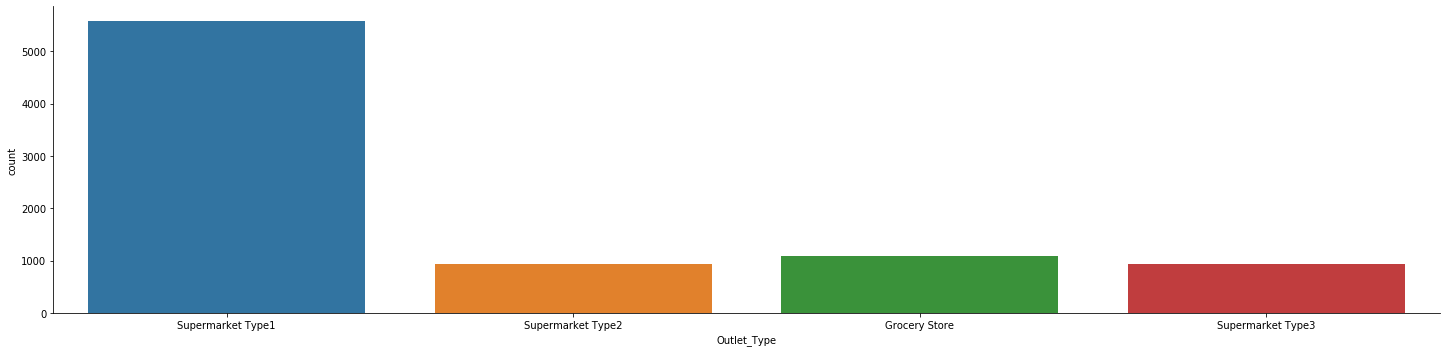

In [25]:
sns.catplot('Outlet_Type',kind = 'count',data = train,aspect =4)

### Observations

Lesser number of observations in the data for the outlets established in the year 1998 as compared to the other years.
Supermarket Type 1 seems to be the most popular category of Outlet_Type.


### Target Variable vs Independent Numerical Variables

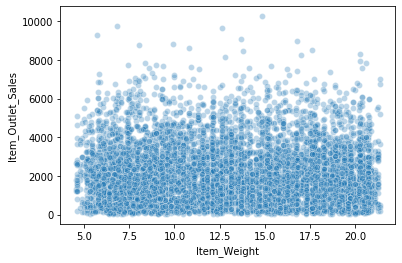

In [26]:
sns.scatterplot(x = 'Item_Weight',y = 'Item_Outlet_Sales',data = train,alpha = 0.3);

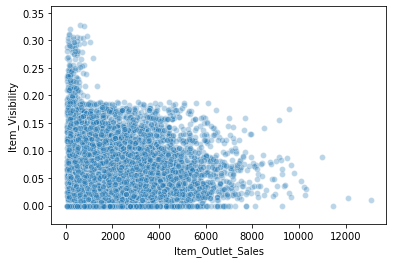

In [27]:
sns.scatterplot(x = 'Item_Outlet_Sales',y = 'Item_Visibility',data = train,alpha = 0.3)

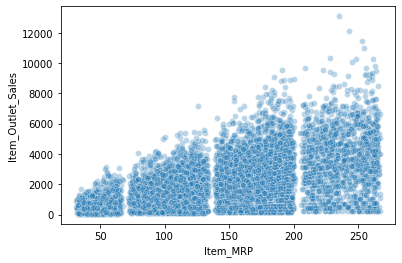

In [28]:
sns.scatterplot(x = 'Item_MRP',y = 'Item_Outlet_Sales',data = train,alpha = 0.3)

### Target Variable vs Independent Categorical Variables

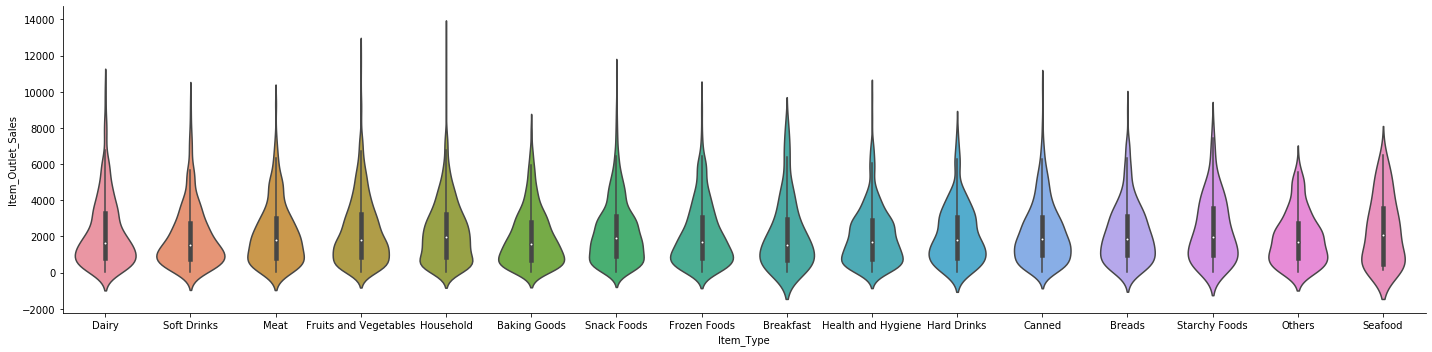

In [29]:
sns.catplot(x = 'Item_Type',y = 'Item_Outlet_Sales',data = train,kind = 'violin',aspect=4)

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
source                       8523 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 865.7+ KB


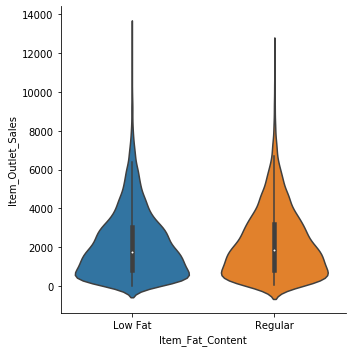

In [31]:
sns.catplot(x = 'Item_Fat_Content',y = 'Item_Outlet_Sales',data = train,kind='violin')

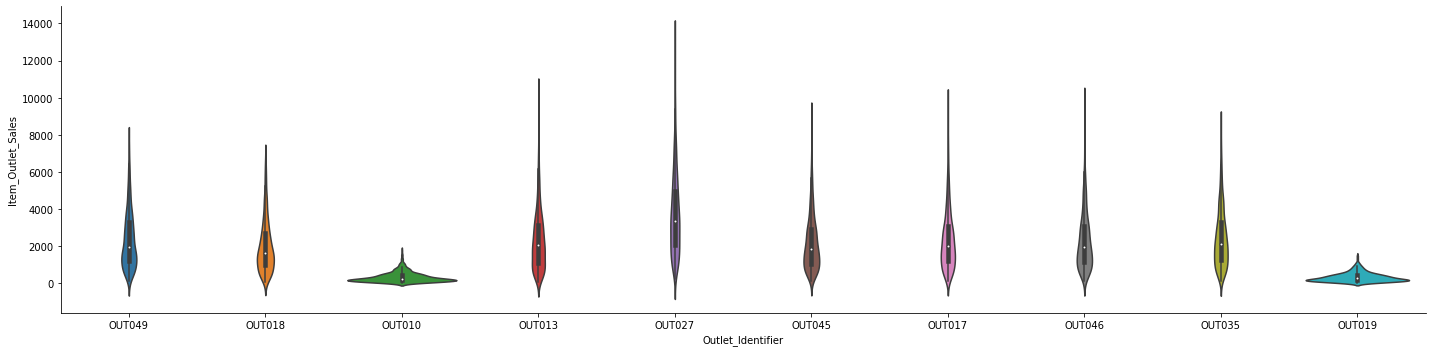

In [32]:
sns.catplot('Outlet_Identifier','Item_Outlet_Sales',kind = 'violin',data = train,aspect = 4)

### Observations

<ul><li>Distribution of Item_Outlet_Sales across the categories of Item_Type is not very distinct and same is the case with Item_Fat_Content.</li>
<li>The distribution for OUT010 and OUT019 categories of Outlet_Identifier are quite similar and very much different from the rest of the categories of Outlet_Identifier.</li></ul>

In the univariate analysis let’s check the distribution of the target variable across Outlet_Size.

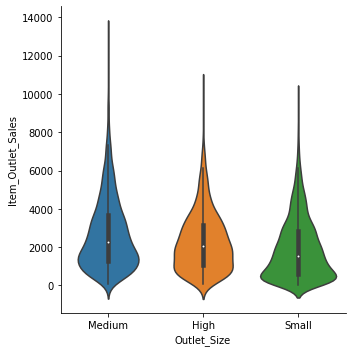

In [33]:
sns.catplot('Outlet_Size','Item_Outlet_Sales',data = train,kind= 'violin')

Let’s examine the remaining variables.

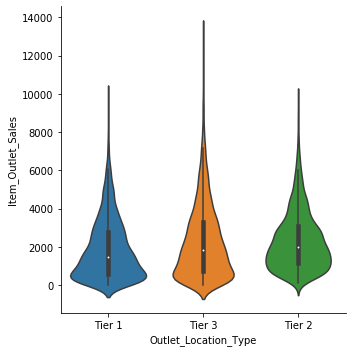

In [34]:
sns.catplot('Outlet_Location_Type','Item_Outlet_Sales',data = train, kind= 'violin')

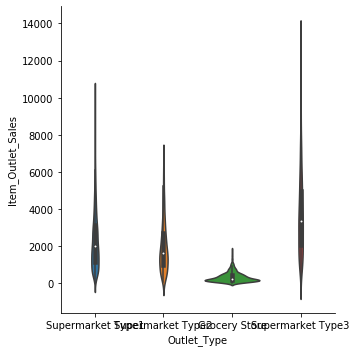

In [35]:
sns.catplot('Outlet_Type','Item_Outlet_Sales',data = train, kind='violin')

### Observations

<ul><li>Tier 1 and Tier 3 locations of Outlet_Location_Type look similar.</li>
<li>In the Outlet_Type plot, Grocery Store has most of its data points around the lower sales values as compared to the other categories.</li></ul>


These are the kind of insights that we can extract by visualizing our data. Hence, data visualization should be an important part of any kind data analysis.




### Missing Data Treatment



In [36]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

### Imputing Missing Value
As you can see above, we have missing values in Item_Weight and Outlet_Size. We’ll now impute Item_Weight with mean weight.

In [37]:
from sklearn.preprocessing import LabelEncoder
l_enc  = LabelEncoder()
a = l_enc.fit_transform(train['Item_Identifier'])

In [38]:
a

array([ 156,    8,  662, ..., 1357,  681,   50])

In [39]:
train['Item_Weight'].fillna(a.mean(),inplace = True)

In [40]:
train.Item_Weight.isna().sum()

0

In [41]:
train['Outlet_Size'].fillna('Small',inplace  = True)

In [42]:
train['Outlet_Size'].isna().sum()

0

0 missing values! It means we have successfully imputed the missing data in the feature.

### Replacing 0’s in Item_Visibility variable


Similarly, zeroes in Item_Visibility variable can be replaced with Item_Visibility wise mean values. It can be visualized in the plot below.

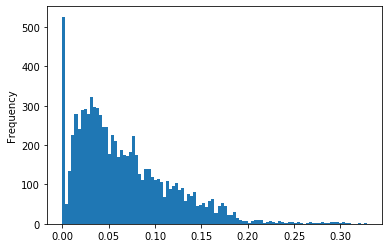

In [43]:
train['Item_Visibility'].plot(kind = 'hist',bins = 100)

Let’s replace the zeroes.


In [44]:
train.shape

(8523, 13)

In [45]:
a= train[train['Item_Visibility']!=0]['Item_Visibility'].mean()

In [46]:
train['Item_Visibility'] = train['Item_Visibility'].replace(0.00,a)

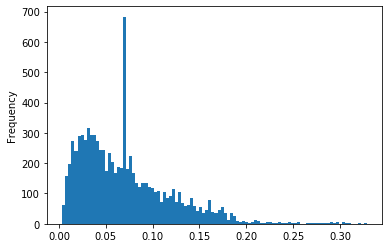

In [47]:
train['Item_Visibility'].plot(kind = 'hist',bins = 100)

### Feature Engineering

In [48]:
perishable = ["Breads", "Breakfast", "Dairy", "Fruits and Vegetables", "Meat", "Seafood"]
non_perishable = ["Baking Goods", "Canned", "Frozen Foods", "Hard Drinks", "Health and Hygiene", "Household", "Soft Drinks"]

create a new feature 'Item_Type_new' 

In [49]:
item_list =[] 
for i in train['Item_Type']:
    if i in perishable:
        item_list.append('perishable')
    elif (i in non_perishable):
        item_list.append('non_perishable')
    else:
        item_list.append('not_sure')
        
train['Item_Type_new'] = item_list

In [50]:
train['Item_Category'] =train['Item_Identifier'].replace({'^DR[A-Z]*[0-9]*':'DR','^FD[A-Z]*[0-9]*':'FD','^NC[A-Z]*[0-9]*':'NC'},regex = True)

In [51]:
Food=pd.crosstab(train['Item_Type'],train['Item_Category'])
Food

Item_Category,DR,FD,NC
Item_Type,,,
Baking Goods,0,648,0
Breads,0,251,0
Breakfast,0,110,0
Canned,0,649,0
Dairy,140,542,0
Frozen Foods,0,856,0
Fruits and Vegetables,0,1232,0
Hard Drinks,214,0,0
Health and Hygiene,0,0,520


We will also change the values of Item_Fat_Content wherever Item_category is ‘NC’ because non-consumable items cannot have any fat content. We will also create a couple of more features — Outlet_Years (years of operation) and price_per_unit_wt (price per unit weight).

In [52]:
train['Item_Fat_Content'][(train['Item_Category']=='NC')]='Non Edible'

In [53]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'Non Edible'], dtype=object)

In [54]:
train['Outlet_Years'] = 2019-train['Outlet_Establishment_Year']

In [55]:
train['Price_Per_Unit_Weight'] = train['Item_MRP']/train['Item_Weight']

Earlier in the Item_MRP vs Item_Outlet_Sales plot, we saw Item_MRP was spread across in 4 chunks. Now let’s assign a label to each of these chunks and use this label as a new variable.

In [56]:
def clusters(x):
    if x<69:
        return '1st'
    elif x in range(69,136):
        return '2nd'
    elif x in range(136,203):
        return '3rd'
    else:
        return '4th'
train['Item_MRP_Clusters'] = train['Item_MRP'].astype('int').apply(clusters)
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_new,Item_Category,Outlet_Years,Price_Per_Unit_Weight,Item_MRP_Clusters
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,perishable,FD,20,26.861204,4th
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,non_perishable,DR,10,8.153581,1st
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,perishable,FD,20,8.092457,3rd
3,FDX07,19.20,Regular,0.070482,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train,perishable,FD,21,9.484115,3rd
4,NCD19,8.93,Non Edible,0.070482,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,non_perishable,NC,32,6.031512,1st


In [57]:
train['Item_MRP_Clusters'].unique()

array(['4th', '1st', '3rd', '2nd'], dtype=object)

### Encoding Categorical Variables

### Label encoding for the categorical variables

We will label encode Outlet_Size and Outlet_Location_Type as these are ordinal variables.

In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
# a = ['Outlet_Size','Outlet_Location_Type']
le = LabelEncoder()
train['Outlet_Size']= le.fit_transform(train['Outlet_Size'])
train['Outlet_Location_Type'] = le.fit_transform(train['Outlet_Location_Type'])
train['Item_Fat_Content'] = le.fit_transform(train['Item_Fat_Content'])
train['Item_MRP_Clusters'] = le.fit_transform(train['Item_MRP_Clusters'])

### One hot encoding for the categorical variable

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 18 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null int64
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null int64
Outlet_Location_Type         8523 non-null int64
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
source                       8523 non-null object
Item_Type_new                8523 non-null object
Item_Category                8523 non-null object
Outlet_Years                 8523 non-null int64
Price_Per_Unit_Weight        8523 non-null float64
Item_MRP_Clusters            8523 non-null 

In [61]:
#train['Outlet_Identifier'].unique(),train['Item_Identifier'].unique(),train['Item_Type'].unique()
a = pd.get_dummies(train[['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type','Item_Type_new','Item_Category']])
train = train.drop(['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type','Item_Type_new','Item_Category','source'],axis = 1 )
train = pd.concat([train,a],axis = 1)

### PreProcessing Data

#### Removing Skewness

In [62]:
train['Price_Per_Unit_Weight'] = np.log(train['Price_Per_Unit_Weight'])
train['Item_Visibility'] = np.log(train['Item_Visibility'])

#### Correlated Variables
Let’s examine the correlated features of train dataset. Correlation varies from -1 to 1.

<ul> 1). negative correlation: < 0 and >= -1 </ul>
<ul> 2). positive correlation: > 0 and <= 1</ul>
<ul> 3). no correlation: 0

In [63]:
corr = train.corr()
corr

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Years,Price_Per_Unit_Weight,...,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_new_non_perishable,Item_Type_new_not_sure,Item_Type_new_perishable,Item_Category_DR,Item_Category_FD,Item_Category_NC
Item_Weight,1.000000,-0.003317,0.066080,-0.008383,-0.697827,-0.061976,0.092652,0.080829,0.697827,-0.931502,...,0.319613,-0.626303,-0.159086,0.771038,-0.016239,0.001699,0.015956,-0.014775,0.010002,-0.000490
Item_Fat_Content,-0.003317,1.000000,0.022764,0.008594,0.001451,-0.000829,0.000958,0.015249,-0.001451,0.007066,...,0.000742,-0.001443,0.001810,-0.000399,-0.039354,-0.012913,0.052585,-0.257054,0.116740,0.057458
Item_Visibility,0.066080,0.022764,1.000000,-0.001259,-0.051790,0.074313,-0.018024,-0.097821,0.051790,-0.061003,...,0.220199,-0.113338,-0.021623,-0.040640,-0.042096,-0.003787,0.048058,-0.000217,0.071544,-0.082243
Item_MRP,-0.008383,0.008594,-0.001259,1.000000,0.005020,0.000872,0.000232,0.567574,-0.005020,0.301232,...,-0.004277,0.004885,0.003850,-0.006714,-0.056826,0.028963,0.037030,-0.051733,0.029315,0.004859
Outlet_Establishment_Year,-0.697827,0.001451,-0.051790,0.005020,1.000000,0.425534,-0.089216,-0.049135,-1.000000,0.649372,...,-0.281196,0.245070,0.466336,-0.538072,0.011359,0.005425,-0.016566,0.009441,-0.002312,-0.004385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Item_Type_new_not_sure,0.001699,-0.012913,-0.003787,0.028963,0.005425,0.000402,-0.004614,0.018100,-0.005425,0.003193,...,-0.006228,0.002164,0.003768,-0.000412,-0.463202,1.000000,-0.322369,-0.149661,0.175873,-0.090831
Item_Type_new_perishable,0.015956,0.052585,0.048058,0.037030,-0.016566,-0.007977,0.002475,0.024315,0.016566,-0.007846,...,0.015642,-0.015081,-0.000764,0.007042,-0.689617,-0.322369,1.000000,-0.102429,0.355441,-0.332921
Item_Category_DR,-0.014775,-0.257054,-0.000217,-0.051733,0.009441,0.003876,-0.005539,-0.034672,-0.009441,0.004486,...,-0.003055,0.011999,-0.003872,-0.011145,0.210390,-0.149661,-0.102429,1.000000,-0.514021,-0.154560
Item_Category_FD,0.010002,0.116740,0.071544,0.029315,-0.002312,-0.003544,-0.001713,0.031905,0.002312,0.002912,...,-0.005712,-0.003772,0.003433,0.008406,-0.467322,0.175873,0.355441,-0.514021,1.000000,-0.768023


The correlation plot above shows correlation between all the possible pairs of variables in out data. The correlation between any two variables is represented with a number. a positive number represents positive correlation and negative number indicates negative correlation.

Variables price_per_unit_wt and Item_Weight are highly correlated as the former one was created from the latter. Similarly price_per_unit_wt and Item_MRP are highly correlated for the same reason.

### Model Building

#### Building Model

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
X = train.drop('Item_Outlet_Sales',axis = 1)
y = train['Item_Outlet_Sales']

### Train - Validation Split

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,random_state = 8)

In [68]:
print(X_train.shape,X_valid.shape,y_train.shape,y_valid.shape)

(6392, 1605) (2131, 1605) (6392,) (2131,)


In [69]:
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Years,Price_Per_Unit_Weight,Item_MRP_Clusters,...,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_new_non_perishable,Item_Type_new_not_sure,Item_Type_new_perishable,Item_Category_DR,Item_Category_FD,Item_Category_NC
4325,13.00,0,-1.873283,79.6986,1997,2,0,22,1.813303,1,...,0,1,0,0,1,0,0,0,1,0
246,12.00,0,-3.382979,179.3976,1987,0,2,32,2.704698,2,...,0,1,0,0,1,0,0,0,1,0
22,14.60,1,-3.661337,196.5084,2004,2,1,15,2.599684,2,...,0,1,0,0,1,0,0,0,0,1
4612,15.50,2,-2.065209,262.1568,1998,2,2,21,2.828103,3,...,1,0,0,0,1,0,0,0,1,0
1894,15.35,0,-4.280608,62.7168,1999,1,0,20,1.407514,0,...,0,1,0,0,1,0,0,0,1,0


In [70]:
model = LinearRegression(normalize=True,fit_intercept= True)

In [71]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [72]:
y_pred = model.predict(X_valid)

In [73]:
model.score(X_train,y_train),model.score(X_valid,y_valid)

(0.6322645448650823, 0.6416837742840321)

In [74]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [75]:
mean_squared_error(y_valid, y_pred),mean_absolute_error(y_valid, y_pred)

(1148714.6176729172, 800.6762335992491)

### XGBOOST REGRESSOR

In [76]:
!pip3 install xgboost

You should consider upgrading via the 'pip install --upgrade pip' command.


In [77]:
pip install --upgrade pip

Requirement already up-to-date: pip in /opt/anaconda3/lib/python3.7/site-packages (20.2.4)
Note: you may need to restart the kernel to use updated packages.


In [78]:
!pip3 install xgboost

You should consider upgrading via the 'pip install --upgrade pip' command.


In [80]:
from sklearn.model_selection import KFold, cross_val_score

from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(X_train,y_train)
predictions = my_model.predict(X_valid)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(y_valid,predictions)))

Mean Absolute Error : 806.2809343419518


### LASSO REGRSSOR

In [81]:
from sklearn.linear_model import Lasso

In [82]:
ls = Lasso(alpha = 0.01)
ls.fit(X_train,y_train)


Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [83]:
predictions = ls.predict(X_valid)

In [84]:
mean_absolute_error(y_valid,predictions)

988.721047949262